## SEACells: Eye

### Load Packages and Data

In [1]:
import sys
sys.path.append('/project/xyang2/TOOLS')

In [2]:
import tqdm
sys.modules['tqdm.notebook'] = tqdm

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
# Some plotting aesthetics
import matplotlib
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100

In [5]:
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("/project/xyang2/TOOLS/SEACells")
import SEACells 

In [6]:
print("SEACells version:", SEACells.__version__)

SEACells version: 0.3.3


In [7]:
INPUT_PATH = '/project/imoskowitz/xyang2/SHH/Qiu_TimeLapse/results/'
adata = ad.read_h5ad(f"{INPUT_PATH}raw_added/Eye_adata_scale.h5ad")
print(adata.obs.keys())

Index(['cell_id', 'celltype_update', 'system', 'meta_group', 'celltype_new',
       'UMAP_1', 'UMAP_2', 'UMAP_3', 'UMAP_2d_1', 'UMAP_2d_2', 'leiden',
       'leiden_res_1', 'leiden_res_2', 'leiden_res_5', 'leiden_res_10'],
      dtype='object')


/project/xyang2/anaconda/py311/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
import glob

INPUT_PATH = "/project/imoskowitz/xyang2/SHH/Qiu_TimeLapse/results/raw_added/"
files = glob.glob(f"{INPUT_PATH}/*.h5ad")
print(len(files), "files found")
for f in files:
    print(f)

15 files found
/project/imoskowitz/xyang2/SHH/Qiu_TimeLapse/results/raw_added/Gut_adata_scale.h5ad
/project/imoskowitz/xyang2/SHH/Qiu_TimeLapse/results/raw_added/Renal_adata_scale.h5ad
/project/imoskowitz/xyang2/SHH/Qiu_TimeLapse/results/raw_added/PNS_glia_adata_scale.h5ad
/project/imoskowitz/xyang2/SHH/Qiu_TimeLapse/results/raw_added/Epithelial_cells_adata_scale.h5ad
/project/imoskowitz/xyang2/SHH/Qiu_TimeLapse/results/raw_added/PNS_neurons_adata_scale.h5ad
/project/imoskowitz/xyang2/SHH/Qiu_TimeLapse/results/raw_added/Notochord_adata_scale.h5ad
/project/imoskowitz/xyang2/SHH/Qiu_TimeLapse/results/raw_added/Neurons_adata_scale.h5ad
/project/imoskowitz/xyang2/SHH/Qiu_TimeLapse/results/raw_added/Eye_adata_scale.h5ad
/project/imoskowitz/xyang2/SHH/Qiu_TimeLapse/results/raw_added/Blood_adata_scale.h5ad
/project/imoskowitz/xyang2/SHH/Qiu_TimeLapse/results/raw_added/Endothelium_adata_scale.h5ad
/project/imoskowitz/xyang2/SHH/Qiu_TimeLapse/results/raw_added/Neuroectoderm_adata_scale.h5ad
/pr

In [9]:
print(type(adata.X))
print(adata.X.shape)
print(adata.X[:5, :5])

<class 'numpy.ndarray'>
(166852, 4000)
[[-0.62518585 -0.05912107 -0.18244895 -0.00855684 -0.21339124]
 [ 0.89266336 -0.05912107 -0.18244895 -0.00855684 -0.21339124]
 [-0.62518585 -0.05912107 -0.18244895 -0.00855684 -0.21339124]
 [-0.62518585 -0.05912107 -0.18244895 -0.00855684 -0.21339124]
 [ 0.12162584 -0.05912107 -0.18244895 -0.00855684 -0.21339124]]


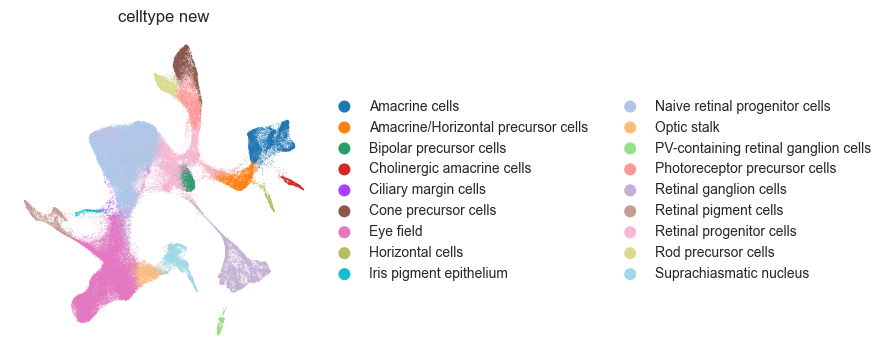

In [10]:
sc.pl.scatter(adata, basis='umap', color='celltype_new', frameon=False)

### Preprocessing Data

In [11]:
adata

AnnData object with n_obs × n_vars = 166852 × 4000
    obs: 'cell_id', 'celltype_update', 'system', 'meta_group', 'celltype_new', 'UMAP_1', 'UMAP_2', 'UMAP_3', 'UMAP_2d_1', 'UMAP_2d_2', 'leiden', 'leiden_res_1', 'leiden_res_2', 'leiden_res_5', 'leiden_res_10'
    var: 'gene_id', 'gene_type', 'gene_short_name', 'chr', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap', 'celltype_new_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [12]:
# Basic data inspection 

# Dimensions
print("Shape of adata:", adata.shape)

# Check obs (cell-level metadata)
print("\nadata.obs columns:")
print(adata.obs.columns)
print("\nExample obs row:")
print(adata.obs.iloc[0])

# Check var (gene-level metadata)
print("\nadata.var columns:")
print(adata.var.columns)
print("\nExample var row:")
print(adata.var.iloc[0])

# Check if any NaNs/Infs
import numpy as np
print("\nNaNs in adata.X:", np.isnan(adata.X).sum())
print("Infs in adata.X:", np.isinf(adata.X).sum())


Shape of adata: (166852, 4000)

adata.obs columns:
Index(['cell_id', 'celltype_update', 'system', 'meta_group', 'celltype_new',
       'UMAP_1', 'UMAP_2', 'UMAP_3', 'UMAP_2d_1', 'UMAP_2d_2', 'leiden',
       'leiden_res_1', 'leiden_res_2', 'leiden_res_5', 'leiden_res_10'],
      dtype='object')

Example obs row:
cell_id            run_4_P2-01A.CATACCGCTGTTCGTCAGA
celltype_update                           Eye field
system                                          Eye
meta_group                                    Ey_M7
celltype_new                              Eye field
UMAP_1                                    -1.904126
UMAP_2                                    -1.280846
UMAP_3                                    11.935302
UMAP_2d_1                                 -4.817788
UMAP_2d_2                                 -3.440519
leiden                                           22
leiden_res_1                                      2
leiden_res_2                                      1
leiden_res


NaNs in adata.X: 0
Infs in adata.X: 0


In [13]:
print(adata.obs["celltype_new"].value_counts())

celltype_new
Naive retinal progenitor cells          52693
Eye field                               43440
Retinal ganglion cells                  11197
Retinal progenitor cells                10201
Amacrine cells                          10061
Suprachiasmatic nucleus                  6017
Cone precursor cells                     5744
Amacrine/Horizontal precursor cells      5154
Photoreceptor precursor cells            4703
Optic stalk                              3457
Bipolar precursor cells                  3414
Retinal pigment cells                    3242
Rod precursor cells                      2743
Cholinergic amacrine cells               1426
PV-containing retinal ganglion cells     1133
Horizontal cells                          910
Ciliary margin cells                      725
Iris pigment epithelium                   592
Name: count, dtype: int64


In [14]:
import numpy as np
gene_means = np.array(adata.X.mean(axis=0)).ravel()
print("Num genes with mean > 0:", np.sum(gene_means > 0))


Num genes with mean > 0: 482


In [15]:
# Convert sparse matrix to dense if needed
if not isinstance(adata.X, np.ndarray):
    adata.X = adata.X.toarray()

# Replace NaNs with 0, and Infs with 0 (or you can choose a small value like 1e-6 if needed)
adata.X = np.nan_to_num(adata.X, nan=0.0, posinf=0.0, neginf=0.0)

# Confirm it's clean now
print("NaNs:", np.isnan(adata.X).sum(), "Infs:", np.isinf(adata.X).sum())
print("min:", np.min(adata.X), "max:", np.max(adata.X), "mean:", np.mean(adata.X))


NaNs: 0 Infs: 0
min: -5.2961106 max: 10.0 mean: -0.0088379355


In [16]:
print("Genes with nonzero mean:", np.sum(gene_means > 0))
print("Genes with mean > 0.01:", np.sum(gene_means > 0.01))


Genes with nonzero mean: 482
Genes with mean > 0.01: 0


In [17]:
# 1. Ensure variable names are strings and unique
adata.var_names = adata.var_names.astype(str)
adata.var_names_make_unique()

# 2. Filter out genes not expressed in at least 3 cells
sc.pp.filter_genes(adata, min_cells=3)

# 3. Save raw counts (required later for SEACells)
adata.raw = adata.copy()

# 4. Normalize and log-transform. IS IT NORMALIZED? 
# sc.pp.normalize_total(adata)  # recommended over normalize_per_cell
# sc.pp.log1p(adata)

# 5. Identify highly variable genes
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000,
    flavor="seurat",  # 'cell_ranger'
    n_bins=50,
    subset=True       # will reduce adata to HVGs
)

# 6. Run PCA on the HVGs
sc.tl.pca(adata, n_comps=30, svd_solver='arpack', use_highly_variable=True)

# Optional: Inspect the updated AnnData
print(adata)


/project/xyang2/anaconda/py311/lib/python3.11/site-packages/scanpy/preprocessing/_pca/__init__.py:438: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


AnnData object with n_obs × n_vars = 166852 × 3000
    obs: 'cell_id', 'celltype_update', 'system', 'meta_group', 'celltype_new', 'UMAP_1', 'UMAP_2', 'UMAP_3', 'UMAP_2d_1', 'UMAP_2d_2', 'leiden', 'leiden_res_1', 'leiden_res_2', 'leiden_res_5', 'leiden_res_10'
    var: 'gene_id', 'gene_type', 'gene_short_name', 'chr', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'n_cells'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap', 'celltype_new_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


### Running SEACells

In [18]:
# 1 metacell for every 75 cells. So 167,000 cells -> ~2222 metacells

n_SEACells = 2200  
build_kernel_on = 'X_pca'
n_waypoint_eigs = 10

In [19]:
model = SEACells.core.SEACells(
    adata,
    build_kernel_on=build_kernel_on,
    n_SEACells=n_SEACells,
    n_waypoint_eigs=n_waypoint_eigs,
    convergence_epsilon=1e-5
)

Welcome to SEACells!


In [20]:
model.construct_kernel_matrix()
M = model.kernel_matrix

Computing kNN graph using scanpy NN ...


Computing radius for adaptive bandwidth kernel...


100%|██████████| 166852/166852 [00:53<00:00, 3143.50it/s]


Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


100%|██████████| 166852/166852 [02:38<00:00, 1049.41it/s]


Building similarity LIL matrix...


100%|██████████| 166852/166852 [08:56<00:00, 311.09it/s]


Constructing CSR matrix...


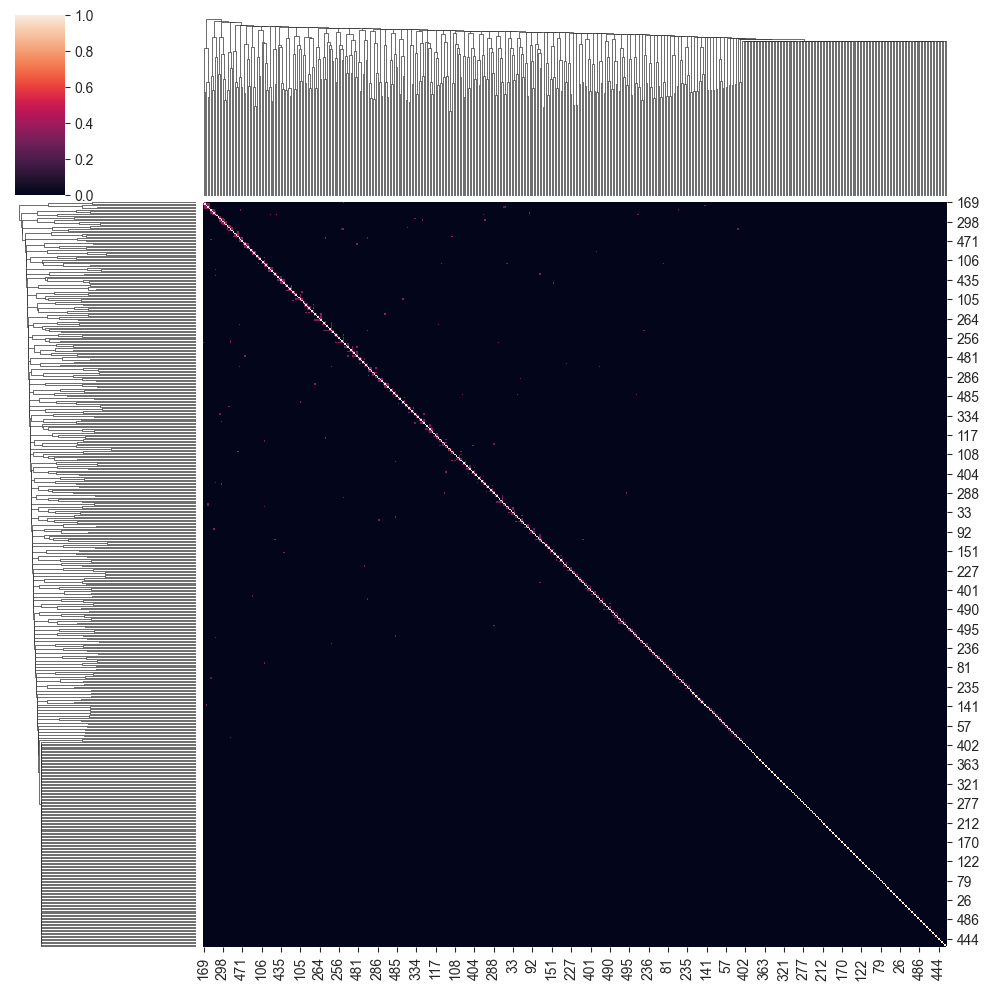

In [21]:
sns.clustermap(M.toarray()[:500,:500])

In [22]:
model.initialize_archetypes()

Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 


Done.
Sampling waypoints ...
Done.
Selecting 2062 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 148/148 [01:33<00:00,  1.58it/s]

Selecting 138 cells from greedy initialization.


In [23]:
print(type(adata))

<class 'anndata._core.anndata.AnnData'>


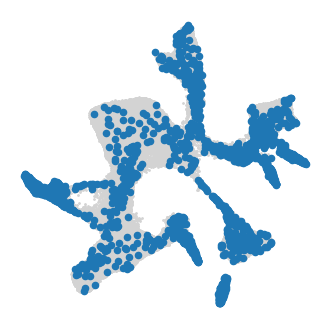

In [24]:
# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(adata, model)

In [ ]:
model.fit(min_iter=10, max_iter=50)

Randomly initialized A matrix.


### Accessing Results

In [ ]:
# Check for convergence 
model.plot_convergence()

#### SEACell Hard Assignment 

In [ ]:
adata.obs[['SEACell']].head()

In [ ]:
model.get_hard_assignments().head()

#### SEACell Soft Assignment 

plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

In [ ]:
labels,weights = model.get_soft_assignments()

In [ ]:
labels.head()

### Summarizing the Data

SEACell_ad = SEACells.core.summarize_by_SEACell(ad, SEACells_label='SEACell', summarize_layer='raw')
SEACell_ad

In [ ]:
SEACell_soft_ad = SEACells.core.summarize_by_soft_SEACell(adata, model.A_, celltype_label='celltype',summarize_layer='raw', minimum_weight=0.05)
SEACell_soft_ad

In [ ]:
SEACell_soft_ad = SEACells.core.summarize_by_soft_SEACell(adata, model.A_, celltype_label='celltype',summarize_layer='raw', minimum_weight=0.05)
SEACell_soft_ad 

In [ ]:
SEACell_soft_ad.obs.head()

### Visualizing and Quantifying Results